# **<span style="color:#6daa9f;">1.Import Library & Packages </span>**


In [1]:
import pandas as pd # table operations
import numpy as np # linear algebra
import seaborn as sns # visualizing
import os # getting path
from sklearn.utils import shuffle
import matplotlib.pyplot as plt # visualizing
import cv2 # haar cascade
from scipy.spatial import distance
import glob
from warnings import filterwarnings
from skimage import io
filterwarnings("ignore")
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.models import Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img ,img_to_array

In [2]:
testfile = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Test'
trainfile = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
validationfile = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'

In [3]:
path  = "../input/face-mask-12k-images-dataset/Face Mask Dataset/"

In [4]:
dataset = {"image_path":[],"mask_status":[],"where":[]}
for where in os.listdir(path):
    for status in os.listdir(path+"/"+where):
        for image in glob.glob(path+where+"/"+status+"/"+"*.png"):
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)
dataset = pd.DataFrame(dataset)
dataset

,image_path,mask_status,where
0,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
1,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
2,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
3,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
4,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
...,...,...,...
11787,../input/face-mask-12k-images-dataset/Face Mas...,WithMask,Train
11788,../input/face-mask-12k-images-dataset/Face Mas...,WithMask,Train
11789,../input/face-mask-12k-images-dataset/Face Mas...,WithMask,Train
11790,../input/face-mask-12k-images-dataset/Face Mas...,WithMask,Train


With Mask: 5883,
Without Mask: 5909



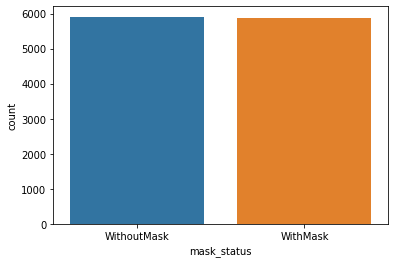

In [5]:
mask = dataset.value_counts("mask_status")[1]
withoutmask = dataset.value_counts("mask_status")[0]
# count value of mask and without mask
print(f"With Mask: {mask},\nWithout Mask: {withoutmask}\n")
sns.countplot(dataset["mask_status"])
plt.show()

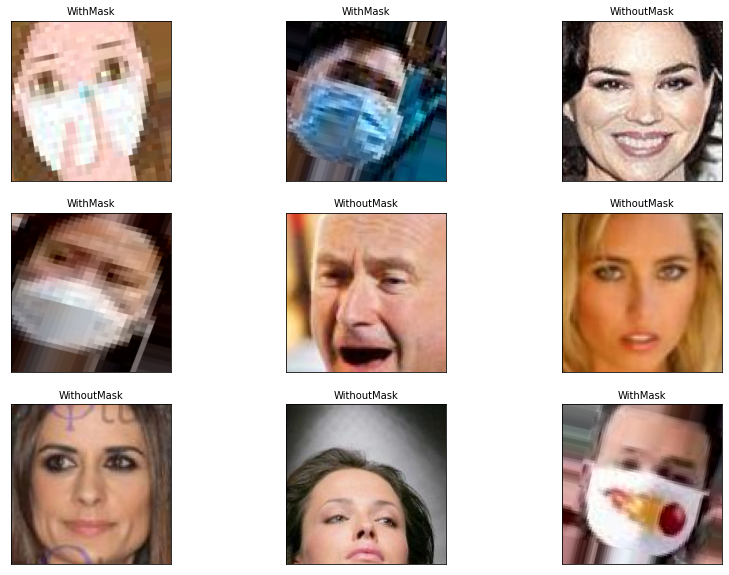

In [6]:
#plot to show random picture of image in file
plt.figure(figsize = (14,10))
for i in range(9):
    random = np.random.randint(1,len(dataset))
    plt.subplot(3,3,i+1)
    plt.imshow(load_img(dataset.loc[random,"image_path"]))
    plt.title(dataset.loc[random, "mask_status"], size = 10) 
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [7]:
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

In [8]:
valid_df.head()

,image_path,mask_status,where
0,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
1,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
2,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
3,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation
4,../input/face-mask-12k-images-dataset/Face Mas...,WithoutMask,Validation


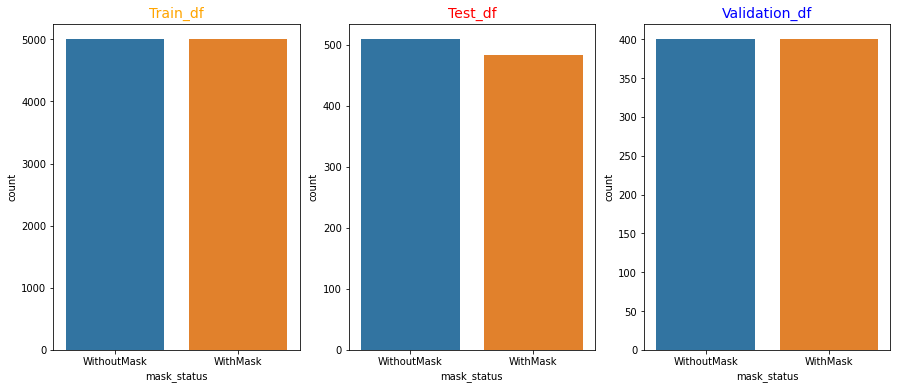

In [9]:
#visualization to show and check if the image for every classes is balanced
plt.figure(figsize = (15,6))
plt.subplot(1,3,1)
sns.countplot(train_df["mask_status"])
plt.title("Train_df", size = 14, color = "orange")


plt.subplot(1,3,2)
sns.countplot(test_df["mask_status"])
plt.title("Test_df", size = 14, color = "red")


plt.subplot(1,3,3)
sns.countplot(valid_df["mask_status"])
plt.title("Validation_df", size = 14, color = "blue")

plt.show()

# **<span style="color:#6daa9f;">4. Load Data </span>**

* load data
* preprocessing image - normalize,resize,convert to grayscale(experiment)
* one hot encoding the label

In [10]:
#dictionary to map without mask to value 0 and with mask to 1
labels_dict = {'WithoutMask':0,'WithMask':1}

#load validation and training data
def load_data(path):
    """
    Loads sign language dataset.
    """
    #size = 60,60
    images, labels = [], []

    for folder in os.listdir(path):
        
        print(folder, end = ' | ')
        for image in os.listdir(path + "/" + folder):
            temp_img = cv2.imread(path + '/' + folder + '/' + image)
            #convert image to grayscale (for experiment)
            #temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2GRAY)
            temp_img = cv2.resize(temp_img, (32,32))
            images.append(temp_img)
            labels.append(labels_dict[folder])
            
    images = np.array(images)
    #normalize image 
    images = images.astype('float32')/255.0
    #one hot encoding the label
    labels = keras.utils.to_categorical(labels)
    
    X_train = images
    y_train = labels
    
    
    print()
    print('Loaded', len(X_train),'images,',' data shape =',X_train.shape)
    #print('Loaded', len(X_test),'images for testing','Test data shape =',X_test.shape)
    
    return X_train, y_train

In [11]:
#load validation and training data
X_train, y_train = load_data(trainfile)
X_valid, y_valid = load_data(validationfile)

WithoutMask | WithMask | 
Loaded 10000 images,  data shape = (10000, 32, 32, 3)
WithoutMask | WithMask | 
Loaded 800 images,  data shape = (800, 32, 32, 3)


X_train = X_train.reshape(-1,32,32,1)
X_valid = X_valid.reshape(-1,32,32,1)

In [12]:
#load validation and training data
X_train, y_train = load_data(trainfile)
X_valid, y_valid = load_data(validationfile)

WithoutMask | WithMask | 
Loaded 10000 images,  data shape = (10000, 32, 32, 3)
WithoutMask | WithMask | 
Loaded 800 images,  data shape = (800, 32, 32, 3)


In [13]:
# **<span style="color:#6daa9f;">4. Model </span>**

In [14]:
#CNN MODEL
def create_model(optimizer):
    model = Sequential()
    model.add(Conv2D(200, (3, 3), input_shape = (32,32,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    
    model.add(Conv2D(100, (3, 3), input_shape =(32,32,3)))
    model.add(Activation('relu'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(2, activation = 'softmax'))
    
    model.compile(loss = "binary_crossentropy", optimizer=optimizer, metrics = ["accuracy"])
    model.summary()

    return model

In [15]:
def fit_model(model):
    
    model_hist = model.fit(X_train, y_train, batch_size = 50, epochs = 30, validation_data = (X_valid,y_valid))
    return model_hist

In [16]:
print('Train and Fit Model 1 with Adam Optimizer and 30 epochs')
model1 = create_model(optimizer = 'adam')
model1_fit = fit_model(model1)

Train and Fit Model 1 with Adam Optimizer and 30 epochs
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 200)       5600      
_________________________________________________________________
activation (Activation)      (None, 30, 30, 200)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 100)         0         
_________________________________________________________________


In [17]:
def evaluate_model(model):
    test_loss,test_acc = model.evaluate(X_valid, y_valid)
    print('Validation accuracy:', test_acc)
    print('Validation loss:', test_loss)
    
evaluate_model(model1)

25/25 [==============================] - 1s 26ms/step - loss: 0.0345 - accuracy: 0.9912
Validation accuracy: 0.9912499785423279
Validation loss: 0.034486740827560425


## Model evaluation

In [18]:
#plot model performance evaluation
def plot_performance(model_fit):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    plt.plot(model_fit.history["accuracy"], label = "train accuracy", color = "red")
    plt.plot(model_fit.history["val_accuracy"], label = "validation accuracy", color = "blue")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(model_fit.history["loss"], label = "train loss", color = "red")
    plt.plot(model_fit.history["val_loss"], label = "validation loss", color = "blue")

    plt.legend()
    plt.show()

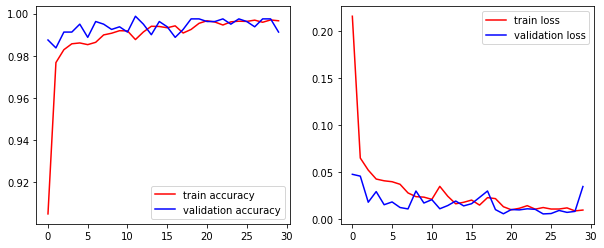

In [20]:
plot_performance(model1_fit)

In [24]:
#preprocess test data
def load_test_data():
    images = []
    names = []
    labels2 = []
    
    for folder in os.listdir(testfile):
        print(folder, end = ' | ')

        for image in os.listdir(testfile+'/'+folder):
            
            temp = cv2.imread(testfile + '/' + folder + '/'+image)
            #temp = cv2.cvtColor(temp, cv2.COLOR_BGR2GRAY)
            temp = cv2.resize(temp, (32,32))

            images.append(temp)
            names.append(image)
            labels2.append(labels_dict[folder])


   
            
            
    #one hot encoding label
    #labels2 = keras.utils.to_categorical(labels2)

  

    images = np.array(images)
    images = images.astype('float32')/255.0
            
    return images, names,labels2

test_images, test_img_names, labels2 = load_test_data()

WithoutMask | WithMask | 

In [26]:
predictions = [model1.predict_classes(image.reshape(1,32,32,3))[0] for image in test_images]

In [27]:
from sklearn import metrics
#classification report for test data predictions f1 score,precision,accuracy
print(metrics.classification_report(predictions,labels2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       508
           1       0.99      0.99      0.99       484

    accuracy                           0.99       992
   macro avg       0.99      0.99      0.99       992
weighted avg       0.99      0.99      0.99       992



In [28]:
#return label for prediction
def get_labels_for_plot(predictions):
    predictions_labels = []
    for i in range(len(predictions)):
        for ins in labels_dict:
            if predictions[i] == labels_dict[ins]:
                predictions_labels.append(ins)
                break
    return predictions_labels

predictions_labels_plot = get_labels_for_plot(predictions)

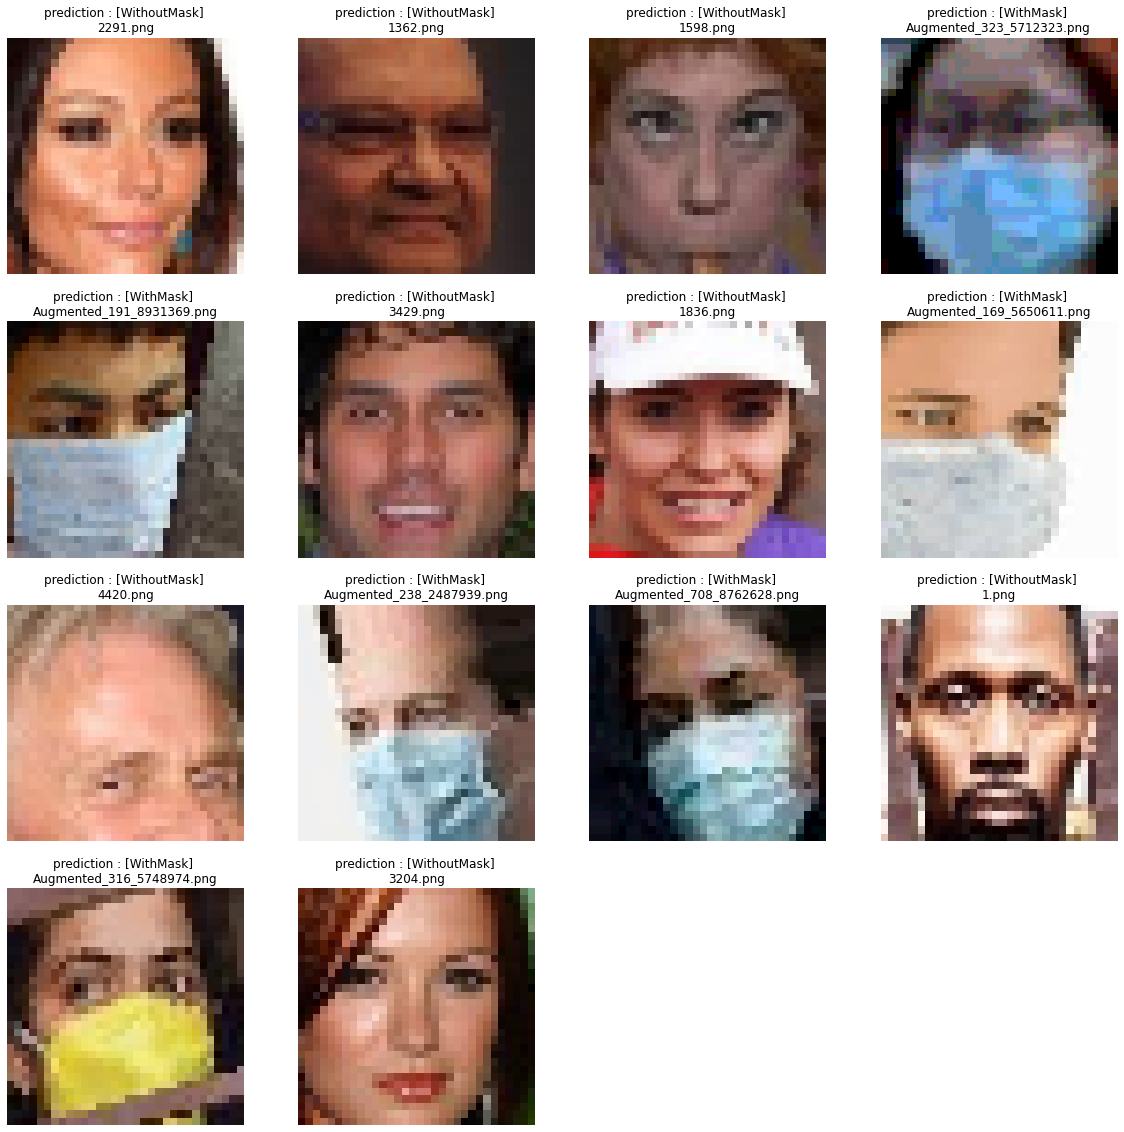

In [29]:
import random as rands
predfigure = plt.figure(figsize = (20,20))
#function to plot image with their prediction label
def plot_image_1(fig, image, label, prediction, predictions_label, row, col, index):
    fig.add_subplot(row, col, index)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    title = "prediction : [" + str(predictions_label) + "] "+ "\n" + label
    plt.title(title)
    return

row = 4
col = 4
#plot random processed image in test data with their prediction label 
for i in range(1,(row*col-1)):
    image_index = rands.randint(1,950)
    plot_image_1(predfigure, test_images[image_index], test_img_names[image_index], predictions[image_index], predictions_labels_plot[image_index], row, col, i)
plt.show()